> [Amanda L Richer, Kent A Riemondy, Lakotah Hardie, Jay R Hesselberth, **Simultaneous measurement of biochemical phenotypes and gene expression in single cells**, *Nucleic Acids Research*, (2020)](https://doi.org/10.1093/nar/gkaa240)

> **Dataset:** Cell line models targeted with CRISPR technology and UNG<sup>KO</sup> and RNASEH2C<sup>KO</sup> used for single cell RNA experssion experiments (haicut-seq) in 3 timepoints. 
> - **Cell line:** Hap1 UNG<sup>KO</sup> (HZGHC001531c012) and RNASEH2C<sup>KO</sup> (HZGHC004633c003) cells.


**Aim:** renalysis of haircut-seq paper

**Tools**: mainly `scanpy`

In [1]:
from utils import *

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.19.2 scipy==1.5.3 pandas==1.1.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 leidenalg==0.8.3


## General workflow
<img src="https://hbctraining.github.io/scRNA-seq/img/sc_workflow_integration.png" width="500" align="center"/>

### `AnnData` object structure:

<img src="http://falexwolf.de/img/scanpy/anndata.svg" width="500" align="left"/>

In [2]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')

sc.logging.print_header()

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.19.2 scipy==1.5.3 pandas==1.1.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 leidenalg==0.8.3


# Load raw count files 
Here we aim to load `kb-count` results into python using `scanpy` library. 

In [3]:
def plot_expriment(adata_m,adata_r,group):
    adata = selected_hairpins(adata_m,adata_r)
    
    fig, axes = plt.subplots(1, 3, figsize=(12,3), gridspec_kw={'wspace':0.5})
    ax4_dict = sc.pl.umap(adata, color=['Uracil-45-1'],ax=axes[0], show=False, title='dU-repair')
    ax5_dict = sc.pl.umap(adata, color=['riboG-44-1'], ax=axes[1], show=False, title='rG-repair')
    ax6_dict = sc.pl.umap(adata,color=group,ax=axes[2], show=False)


### mix15 experiment

In [28]:
mix15_m, mix15_r = read_data('mix15')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.


### mix30 experiment

In [29]:
mix30_m,mix30_r = read_data('mix30')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.


### mix60 experiment

In [30]:
mix60_m,mix60_r = read_data('mix60')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.


## Highest expresed genes

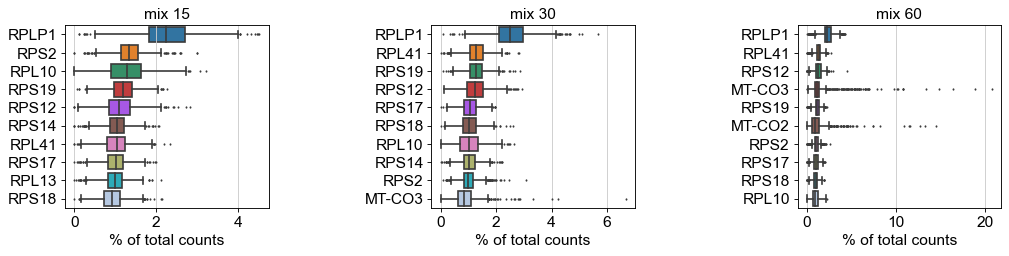

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15,3), gridspec_kw={'wspace':0.8})
ax1_dict = sc.pl.highest_expr_genes(mix15_m, n_top=10,ax=axes[0],show=False)
ax1_dict.set_title('mix 15')
ax2_dict = sc.pl.highest_expr_genes(mix30_m, n_top=10,ax=axes[1],show=False)
ax2_dict.set_title('mix 30')
ax3_dict = sc.pl.highest_expr_genes(mix60_m, n_top=10,ax=axes[2],show=False)
ax3_dict.set_title('mix 60')

plt.show()

## Merge experiments

In [32]:
# mRNA experssion 
mix_m0 = mix15_m.concatenate(mix30_m,mix60_m)
mix_m = ad.AnnData(mix_m0.to_df())
mix_m.obs['time'] = 0
mix_m.obs.loc[mix_m.obs.index.str.contains('-0'),'time'] = 15
mix_m.obs.loc[mix_m.obs.index.str.contains('-1'),'time'] = 30
mix_m.obs.loc[mix_m.obs.index.str.contains('-2'),'time'] = 60

# hairpin counts 
mix_r0 = mix15_r.concatenate(mix30_r,mix60_r)
mix_r = ad.AnnData(mix_r0.to_df())

mix_m.obs = pd.concat([mix_m.obs,selected_hairpins(mix_m0,mix_r0,out='df') ],axis=1)

mix = mix_m

## Define phenotype features 

In [33]:
plt.rcParams["figure.figsize"] = (10,5)

def add_hist(data, i,name):
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)

    colors = ['gray', 'green', 'darkgreen']
    # Draw the plot
    binwidth = round(max(data.max(axis=0)))
    ax.hist(data, histtype='step', stacked=True, fill=False, bins = binwidth, color= colors,label=['15','30','60'])

    # Title and labels
    ax.set_title(f'\n\n{name}', size = 15)
    ax.legend(prop={'size': 10})
    ax.set_xlabel('Counts', size = 13)
    if i !=1: ax.set_ylabel('log(Frequency)', size= 13)
    plt.yscale('log')
    
    vline1 = round(pd.Series([data[c][data[c] >= 1].quantile(q= 0.10) for c in data.columns]).mean())
    vline2= round(pd.Series([data[c][data[c] >= 1].quantile(q= 0.60) for c in data.columns]).mean())
    
    plt.axvline(vline1,color='darkblue', linestyle='dashed', linewidth=1)
    plt.axvline(vline2,color='darkgreen',linestyle='dashed', linewidth=1)
    
    return vline1, vline2

riboG-44 hairpin count @15': #390 cells >= 2 and #186 cells >= 6
Uracil-45 hairpin count @15': #631 cells >= 6 and #281 cells >= 21
riboG-44 hairpin count @30': #510 cells >= 2 and #309 cells >= 6
Uracil-45 hairpin count @30': #722 cells >= 6 and #409 cells >= 21
riboG-44 hairpin count @60': #831 cells >= 2 and #164 cells >= 6
Uracil-45 hairpin count @60': #1245 cells >= 6 and #291 cells >= 21


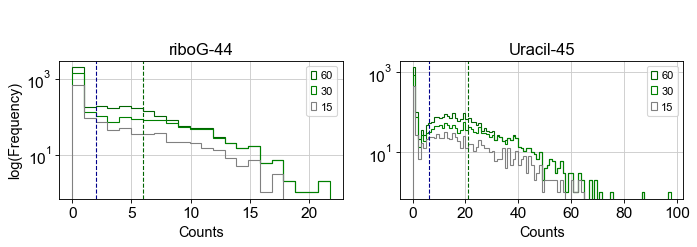

In [34]:
dfs=[]
for time in [15,30,60]:
    df = mix.obs[mix.obs.time == time].reset_index(drop=True).drop('time',1)    
    dfs.append(df)
    
rG = pd.concat([df['riboG-44'] for df in dfs],axis=1).dropna()
rG.columns=['15','30','60']

dU = pd.concat([df['Uracil-45'] for df in dfs],axis=1).dropna()
dU.columns=['15','30','60']

rG_v1,rG_v2 = add_hist(rG,0,'riboG-44')
dU_v1,dU_v2 = add_hist(dU,1,'Uracil-45')


for time in [15,30,60]:
    c1 = mix [(mix.obs['riboG-44'] >= rG_v1) & (mix.obs['time'] == time)].shape[0] 
    c2 = mix [(mix.obs['riboG-44'] >= rG_v2) & (mix.obs['time'] == time)].shape[0] 
    print (f"riboG-44 hairpin count @{time}': #{c1} cells >= {rG_v1} and #{c2} cells >= {rG_v2}")
    
    c1 = mix [(mix.obs['Uracil-45'] >= dU_v1) & (mix.obs['time'] == time)].shape[0] 
    c2 = mix [(mix.obs['Uracil-45'] >= dU_v2) & (mix.obs['time'] == time)].shape[0] 
    print (f"Uracil-45 hairpin count @{time}': #{c1} cells >= {dU_v1} and #{c2} cells >= {dU_v2}")
    
plt.savefig('preprocessing/hist.pdf')
plt.show()

### Actual labeling 

In [35]:
def add_repair_label(mix,v1,v2,hairpin):
    
    categories = np.array(['high', 'low', 'none'])

    if hairpin == 'Uracil':  hairpin_cnt= hairpin + '-45'
    if hairpin == 'riboG':   hairpin_cnt= hairpin + '-44'
    
    high = mix.obs.index[mix.obs[hairpin_cnt]  >= v2]
    low  = mix.obs.index[(mix.obs[hairpin_cnt] < v2 ) & (mix.obs[hairpin_cnt] >= v1)]
    none = mix.obs.index[mix.obs[hairpin_cnt]  < v1]
    
    repair = pd.Series(index=mix.obs.index,dtype=str)
    repair.loc[high] = 'high'
    repair.loc[low] = 'low'
    repair.loc[none] = 'none'
    
    mix.obs[f'{hairpin}-repair'] = pd.Categorical(repair, categories=categories, ordered=True)
    
    return mix

In [36]:
mix = add_repair_label(mix,rG_v1,rG_v2,'riboG')
mix = add_repair_label(mix,dU_v1,dU_v2,'Uracil')

Actual labeling for each timepoint:

In [37]:
mix15_m.obs = pd.concat([mix15_m.obs,selected_hairpins(mix15_m,mix15_r,out='df') ],axis=1)
mix15 = mix15_m
mix15 = add_repair_label(mix15,rG_v1,rG_v2,'riboG')
mix15 = add_repair_label(mix15,dU_v1,dU_v2,'Uracil')

In [38]:
mix30_m.obs = pd.concat([mix30_m.obs,selected_hairpins(mix30_m,mix30_r,out='df') ],axis=1)
mix30 = mix30_m
mix30 = add_repair_label(mix30,rG_v1,rG_v2,'riboG')
mix30 = add_repair_label(mix30,dU_v1,dU_v2,'Uracil')

In [39]:
mix60_m.obs = pd.concat([mix60_m.obs,selected_hairpins(mix60_m,mix60_r,out='df') ],axis=1)
mix60 = mix60_m
mix60 = add_repair_label(mix60,rG_v1,rG_v2,'riboG')
mix60 = add_repair_label(mix60,dU_v1,dU_v2,'Uracil')

# UMAP Visualization 

In [4]:
# https://stackoverflow.com/questions/27426668/row-titles-for-matplotlib-subplot
import matplotlib.pyplot as plt 
from matplotlib.gridspec import SubplotSpec

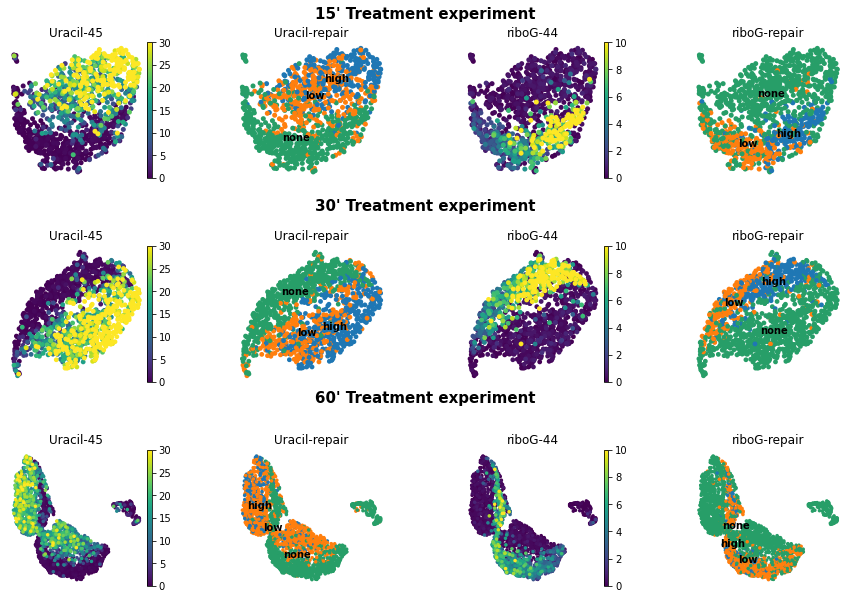

In [7]:
rows = 3
cols = 4

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    

    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold', fontsize=15)
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

fig, axes = plt.subplots(rows, cols, figsize=(15,10), gridspec_kw={'hspace':0.5,'wspace':0.5})

for i,adata in enumerate([mix15,mix30,mix60]):
    ax1_dict = sc.pl.umap(adata, color=['Uracil-45'],ax=axes[i,0], show=False, vmax=30)
    ax1_dict.axis('off')
    
    ax2_dict = sc.pl.umap(adata, color=['Uracil-repair'],ax=axes[i,1], show=False,legend_loc='on data')
    ax2_dict.axis('off')
    
    ax3_dict = sc.pl.umap(adata, color=['riboG-44'], ax=axes[i,2], show=False, vmax=10)
    ax3_dict.axis('off')
    
    ax4_dict = sc.pl.umap(adata, color=['riboG-repair'],ax=axes[i,3], show=False,legend_loc='on data')
    ax4_dict.axis('off')
        
grid = plt.GridSpec(rows, cols)
create_subtitle(fig, grid[0, ::], '15\' Treatment experiment')
create_subtitle(fig, grid[1, ::], '30\' Treatment experiment')
create_subtitle(fig, grid[2, ::], '60\' Treatment experiment')

fig.set_facecolor('w')
fig.savefig('preprocessing/umap.pdf')
plt.show()

### Some basic statistics 

In [60]:
mix.shape[0]

4865

In [5]:
mix.obs['time'].value_counts()

60    2377
30    1301
15    1187
Name: time, dtype: int64

In [53]:
mix.obs['riboG-repair'].value_counts()

none    3134
low     1072
high     659
Name: riboG-repair, dtype: int64

In [8]:
mix.obs[['riboG-repair','time']].value_counts()

riboG-repair  time
none          60      1546
              15       797
              30       791
low           60       667
high          30       309
low           15       204
              30       201
high          15       186
              60       164
dtype: int64

In [55]:
mix.obs['Uracil-repair'].value_counts()

none    2267
low     1617
high     981
Name: Uracil-repair, dtype: int64

In [54]:
mix.obs[['Uracil-repair','time']].value_counts()

Uracil-repair  time
none           60      1132
low            60       954
none           30       579
               15       556
high           30       409
low            15       350
               30       313
high           60       291
               15       281
dtype: int64

___
### Save processed data 

In [44]:
mix.write('preprocessing/mix.h5ad.gz',compression='gzip')

Save each timepoints into separate `h5ad` file:

In [45]:
mix15.write('preprocessing/mix15.h5ad.gz',compression='gzip')

In [46]:
mix30.write('preprocessing/mix30.h5ad.gz',compression='gzip')

In [47]:
mix60.write('preprocessing/mix60.h5ad.gz',compression='gzip')

A zip file of the three MatrixMarket files (.mtx, .mtx_cols, .mtx_rows)

In [131]:
# from zipfile import ZipFile
# # https://thispointer.com/python-how-to-create-a-zip-archive-from-multiple-files-or-directory/
# def write_adata(adata,name):
#     adata.obs.to_csv(f'{name}.mtx_rows.gz',compression='gzip')
#     adata.var.to_csv(f'{name}.mtx_cols.gz',compression='gzip')
#     adata.to_df().to_csv(f'{name}.mtx.gz', compression='gzip')

#     # create a ZipFile object
#     zipObj = ZipFile(f'{name}.zip', 'w')
#     # Add multiple files to the zip
#     zipObj.write(f'{name}.mtx_rows.gz')
#     zipObj.write(f'{name}.mtx_cols.gz')
#     zipObj.write(f'{name}.mtx.gz')
#     # close the Zip File
#     zipObj.close()

In [132]:
# write_adata(mix, 'preprocessing/mix')